In [191]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import shapiro,normaltest,f_oneway
# import statsmodels.api as sm
from sklearn.ensemble import AdaBoostRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [218]:
df  = pd.read_csv("../../ISTC_ml_courses/DataSets/train.csv")

In [219]:
Y = df["price"]
X_df = data.drop(["price"],axis=1)
    

In [221]:
X_train, X_test, y_train, y_test = train_test_split(X_df,Y)

In [36]:
cond_good = data[data["condition"] == "good"]
cond_zero = data[data["condition"] == "zero condition"]
cond_newly = data[data["condition"] == "newly repaired"]

In [37]:
data.head()

,ID,price,condition,district,max_floor,street,num_rooms,region,area,url,num_bathrooms,building_type,floor,ceiling_height,log_price
0,1719,72000.0,newly repaired,Center,11,Tsitsernakaberd Highway,2,Yerevan,67.0,http://www.myrealty.am/en/item/35137/2-senyaka...,1,other,9,3.0,11.184421
1,2817,80000.0,newly repaired,Arabkir,5,Komitas Ave,3,Yerevan,75.0,http://www.myrealty.am/en/item/17923/3-senyaka...,1,stone,2,3.2,11.289782
2,6710,204000.0,newly repaired,Center,4,Saryan St,4,Yerevan,140.0,http://www.myrealty.am/en/item/38137/4-senyaka...,2,stone,4,2.8,12.225875
3,5749,68000.0,good,Arabkir,5,Aghbyur Serob St,3,Yerevan,79.0,http://www.myrealty.am/en/item/31450/3-senyaka...,1,stone,3,2.8,11.127263
4,4747,39000.0,newly repaired,Erebuni,9,Rostovyan St,1,Yerevan,45.0,http://www.myrealty.am/en/item/35365/1-senyaka...,1,panel,2,2.8,10.571317


In [108]:
from sklearn.ensemble import RandomForestRegressor

In [52]:
def categorical_col_analysis(df,col):

    # Categories and appearances
    values_dict = df[col].value_counts().to_dict()
    print("Column value counts")
    print(df[col].value_counts(),"\n")
    labels = []
    values = []
    for key, value in values_dict.items():
        labels.append(key)
        values.append(value)

    # Pieplot and barplot
    plt.figure(figsize=(12, 4))

    plt.subplot(121)
    plt.title("Pieplot of {0}".format(col))
    plt.pie(values, labels=labels, autopct='%1.1f%%')
    plt.subplot(122)
    sns.barplot(x=labels, y=values).set_title("Barplot of {0}".format(col))
    plt.subplots_adjust(wspace=1)
    plt.show()
    print('======================================================================')
    
def cat_num(df, cat_col, num_col):

    labels = df[cat_col].unique()
    print(num_col + ' dependence on', cat_col)
    for label in labels:
        print('\nLabel: ', label, '\n')
        print(df[num_col][df[cat_col] == label].describe())

    values = pd.concat([df[num_col], df[cat_col]], axis=1)
    fig = sns.boxplot(x=cat_col, y=num_col, data=values)
    plt.show()
    print('======================================================================')


def normality_test(df:pd.core.frame.DataFrame, col:str, alpha=0.05):

    # print col describe
    print("Column info","\n")
    print(df[col].describe(),"\n")
    # drop nans and duplicates
    df = df[df[col].notna()]
    column = df[col].drop_duplicates()
    # dist plot and qqplot
    print('Skewness: ', df[col].skew())
    print('Kurtosis: ', df[col].kurt(), '\n\n')
    # plot col distplot
    sns.distplot(column).set_title("DistPlot for {0}".format(col))
    plt.show()
    # qq plot
#     sm.qqplot(column, line='45', fit=True)
#     plt.title('Q-Q plot for {0}'.format(col))
#     plt.show()
    # Shapiro-Wilk test
    print('Shapiro-Wilk Test')
    stat, p = shapiro(column)
    if p > alpha:
        print('Accept Ho: Distribution over ' + col + ' is normal (alpha = 5%)')
    else:
        print('Reject Ho: Distribution over ' + col + ' is not normal (alpha = 5%)')
    print('P_value: ', p,'\n')

    # D’Agostino’s K^2 Test (tests Skewness and Kurtosis)
    print('D’Agostino’s Test')
    stat, p = normaltest(column)
    if p > alpha:
        print('Accept Ho: Distribution over ' + col + ' is normal (alpha = 5%)')
    else:
        print('Reject Ho: Distribution over ' + col + ' is not normal (alpha = 5%)')

    print('P_value: ', p, '\n')
    print('======================================================================')
    
def anova_test(data1, data2, data3, alpha=0.05):

    # anova test (equal means)

    print("{0} sample size: {1}, mean {2}".format("first_samples", data1.shape[0], np.mean(data1)))
    print("{0} sample size: {1}, mean {2}".format("second_samples", data2.shape[0], np.mean(data2)))
    print("{0} sample size: {1}, mean {2}".format("thired_samples", data3.shape[0], np.mean(data3)))
    print("\n")

    print('ANOVA test')
    stat, p = f_oneway(data1, data2, data3)

    if p > alpha:
        print('Accept Ho: All input samples are from populations with equal means (alpha = 5%)')
    else:
        print('Reject Ho: All input samples are not from populations with equal means (alpha = 5%)')
    print('\n')
    print('======================================================================')

Column info 

count      4176.000000
mean      86346.310584
std       53391.806827
min       18500.000000
25%       50000.000000
50%       70000.000000
75%      107000.000000
max      550000.000000
Name: price, dtype: float64 

Skewness:  2.0453375220616055
Kurtosis:  6.36537692873639 




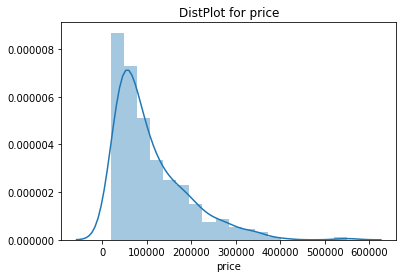

Shapiro-Wilk Test
Reject Ho: Distribution over price is not normal (alpha = 5%)
P_value:  5.812680882471381e-17 

D’Agostino’s Test
Reject Ho: Distribution over price is not normal (alpha = 5%)
P_value:  1.8375145153985132e-23 



In [53]:
normality_test(data,"price")

Column info 

count    4176.000000
mean       11.217744
std         0.524475
min         9.825526
25%        10.819778
50%        11.156251
75%        11.580584
max        13.217674
Name: log_price, dtype: float64 

Skewness:  0.5055383627100656
Kurtosis:  -0.2541427061703012 




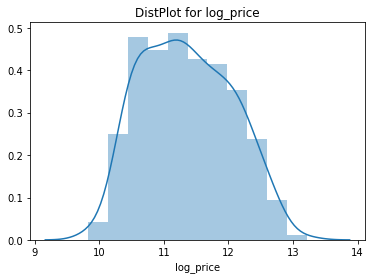

Shapiro-Wilk Test
Reject Ho: Distribution over log_price is not normal (alpha = 5%)
P_value:  0.00025471122353337705 

D’Agostino’s Test
Reject Ho: Distribution over log_price is not normal (alpha = 5%)
P_value:  9.408394110135047e-07 



In [54]:
data["log_price"] = np.log(data["price"])
normality_test(data,"log_price")

Column info 

count    4176.000000
mean       81.682471
std        24.953576
min        27.000000
25%        65.000000
50%        80.000000
75%        98.000000
max       149.000000
Name: area, dtype: float64 

Skewness:  0.32650133175420865
Kurtosis:  -0.2738865940791828 




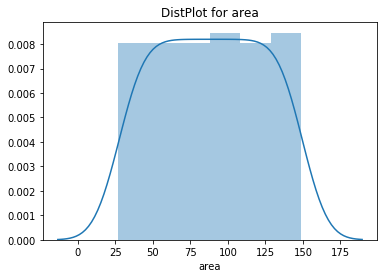

Shapiro-Wilk Test
Reject Ho: Distribution over area is not normal (alpha = 5%)
P_value:  0.0004890558193437755 

D’Agostino’s Test
Reject Ho: Distribution over area is not normal (alpha = 5%)
P_value:  2.326431691703078e-10 



In [55]:
normality_test(data,"area")

In [62]:
data["num_bathrooms"].value_counts()

1    3536
2     597
3      39
4       4
Name: num_bathrooms, dtype: int64

In [70]:
print("mean for all data:",data["price"].mean())
print("mean for 2 bath:",data[data["num_bathrooms"] == 2]["price"].mean())
print("mean for 3 bath:",data[data["num_bathrooms"] == 3]["price"].mean())
print("mean for 4 bath:",data[data["num_bathrooms"] == 4]["price"].mean())


mean for all data: 86346.31058429119
mean for 2 bath: 140794.8040201005
mean for 3 bath: 163361.53846153847
mean for 4 bath: 183250.0


Column value counts
newly repaired    2404
good              1426
zero condition     346
Name: condition, dtype: int64 



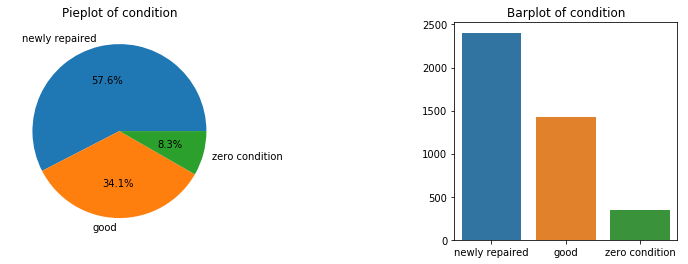

In [56]:
categorical_col_analysis(df=data,col="condition")

Column value counts
stone      1557
panel      1320
monolit     925
other       374
Name: building_type, dtype: int64 



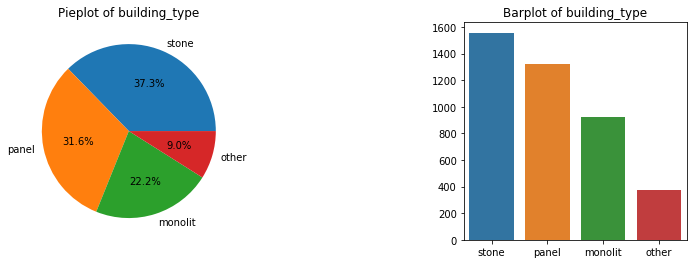

In [59]:
categorical_col_analysis(data,"building_type")

price dependence on condition

Label:  newly repaired 

count      2404.000000
mean      95580.098170
std       57234.785403
min       25000.000000
25%       57000.000000
50%       79000.000000
75%      119250.000000
max      550000.000000
Name: price, dtype: float64

Label:  good 

count      1426.000000
mean      69328.532258
std       40688.047532
min       18500.000000
25%       43000.000000
50%       56000.000000
75%       80000.000000
max      340000.000000
Name: price, dtype: float64

Label:  zero condition 

count       346.000000
mean      92327.023121
std       54914.337502
min       26000.000000
25%       54000.000000
50%       77000.000000
75%      115375.000000
max      360000.000000
Name: price, dtype: float64


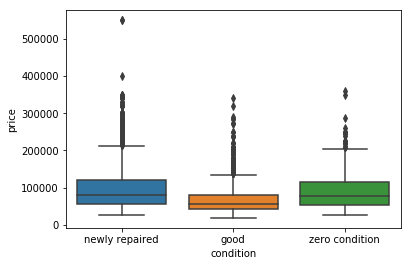

In [57]:
cat_num(df=data,cat_col="condition",num_col="price")

In [58]:
anova_test(cond_good["price"],cond_newly["price"],cond_zero["price"])

first_samples sample size: 1426, mean 69328.53225806452
second_samples sample size: 2404, mean 95580.09816971714
thired_samples sample size: 346, mean 92327.02312138729


ANOVA test
Reject Ho: All input samples are not from populations with equal means (alpha = 5%)




In [48]:
def classification_with_cat(df, num_col1, num_col2, cat_col):


    unique_categorical = df[cat_col].unique()
    sccaters = []

    for i,val in enumerate(unique_categorical):
        x_part = df[num_col1][df[cat_col] == val]
        y_part = df[num_col2][df[cat_col] == val]
        sccaters.append(plt.scatter(x=x_part, y=y_part))

    plt.legend(sccaters, unique_categorical)
    plt.xlabel(num_col1)
    plt.ylabel(num_col2)
    plt.show()

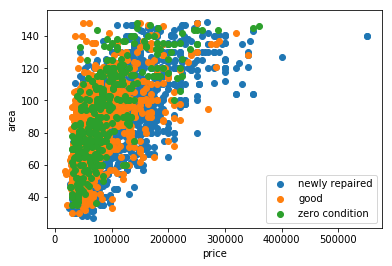

In [49]:
classification_with_cat(df=data,num_col1="price",num_col2="area",cat_col="condition")

In [73]:
data.columns

Index(['ID', 'price', 'condition', 'district', 'max_floor', 'street',
       'num_rooms', 'region', 'area', 'url', 'num_bathrooms', 'building_type',
       'floor', 'ceiling_height', 'log_price'],
      dtype='object')

In [222]:
X_train["floor/max"] = X_train["floor"]/X_train["max_floor"]
cond_get_dummies = pd.get_dummies(X_train["condition"])
district_get_dummies = pd.get_dummies(X_train["district"])

/root/environments/my_env/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [223]:
X = pd.concat((X_train[["area","floor/max"]],cond_get_dummies,district_get_dummies),axis=1)
# X = data[["area","floor/max"]] 
y = y_train
std_scal = StandardScaler()
std_scal.fit(X)
X = std_scal.transform(X)
std_scal.fit(y.values.reshape(-1,1))
y = std_scal.transform(y.values.reshape(-1,1))

In [224]:
rf = RandomForestRegressor()
rf.fit(X,y)

/root/environments/my_env/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/root/environments/my_env/lib/python3.6/site-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [225]:
rf.score(X,y)

0.9171329312512295

In [209]:
rf.feature_importances_

array([5.84190704e-01, 1.60119614e-01, 1.14900509e-02, 3.37240646e-02,
       4.78014475e-03, 7.13126659e-04, 2.80516797e-02, 1.47042040e-03,
       1.66475707e-01, 3.21182850e-03, 3.08359340e-04, 1.15499077e-03,
       8.89391723e-04, 1.67146530e-03, 1.15546731e-03, 4.68151617e-04,
       1.24834216e-04])

In [214]:
X.shape

(1044, 16)

In [228]:
cond_get_dummies = pd.get_dummies(X_test["condition"])
district_get_dummies = pd.get_dummies(X_test["district"])
X_test["floor/max"] = X_test["floor"]/X_test["max_floor"]
X = pd.concat((X_test[["area","floor/max"]],cond_get_dummies,district_get_dummies),axis=1)
y = y_test
std_scal = StandardScaler()
std_scal.fit(X)
X = std_scal.transform(X)
std_scal.fit(y.values.reshape(-1,1))
y = std_scal.transform(y.values.reshape(-1,1))
pred = rf.predict(X)
rf.score(X,y)

/root/environments/my_env/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


0.7011869158245279